In [10]:
from keras import datasets, models, layers, optimizers, losses, utils
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_img, train_lbl), (test_img, test_lbl) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = train_img.reshape(60000, 784)
X_test = test_img.reshape(10000, 784)

In [ ]:
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255

In [ ]:
y_train=utils.to_categorical(train_lbl, 10)
y_test=utils.to_categorical(test_lbl, 10)

In [ ]:
m1 = models.Sequential()
m1.add(layers.Dense(500, activation='relu', input_shape=(784,)))
m1.add(layers.Dense(250, activation='relu'))
m1.add(layers.Dense(10, activation='softmax'))


In [ ]:
m1.compile(optimizer=optimizers.legacy.SGD(learning_rate=0.00), loss=losses.categorical_crossentropy)

In [ ]:
m1.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3273 - val_loss: 2.3249
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3273 - val_loss: 2.3249
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3273 - val_loss: 2.3249
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 2.3273 - val_loss: 2.3249
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3273 - val_loss: 2.3249
Epoch 6/20
375/375 [==============================] - 2s 7ms/step - loss: 2.3273 - val_loss: 2.3249
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 2.3273 - val_loss: 2.3249
Epoch 8/20
375/375 [==============================] - 3s 8ms/step - loss: 2.3273 - val_loss: 2.3249
Epoch 9/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3273 - val_loss: 2.3249
Epoch 10/20
375/375 [==============================] - 2s 7ms/step - loss: 2.3273 - val_loss: 2.3249

313/313 [==============================] - 1s 3ms/step


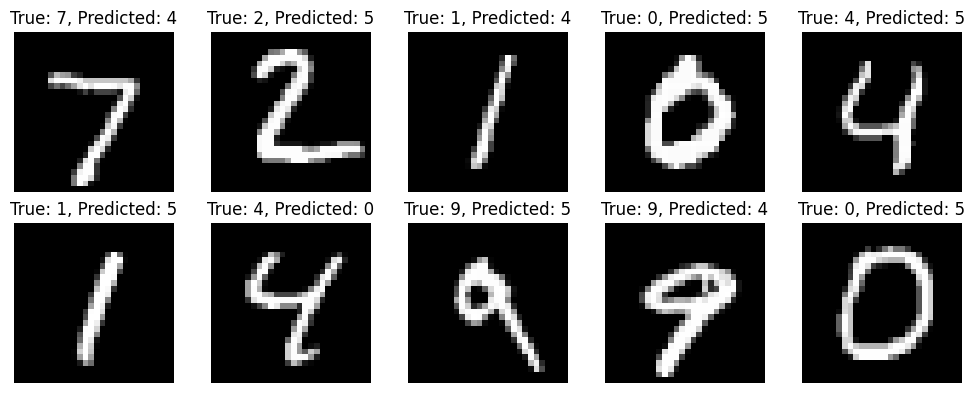

In [ ]:
predictions = m1.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

error_indices = np.where(predicted_labels != true_labels)[0]

plt.figure(figsize=(10, 4))
for i, idx in enumerate(error_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_labels[idx]}, Predicted: {predicted_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 10)                2510      
                                                                 
Total params: 520260 (1.98 MB)
Trainable params: 520260 (1.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


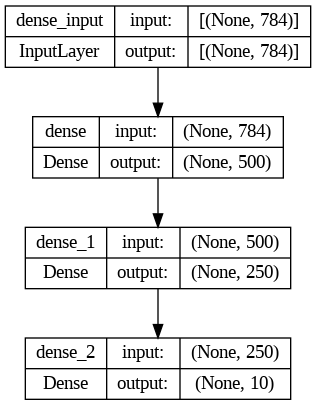

In [12]:
plot_model(m1, show_shapes=True)